# QWERTY effect for IMDB movie titles

Ombd snapshot, Brian Fritz (bfritz@fadingsignal.com). Aug 2015 http://www.omdbapi.com/ 
License CC 4.0 http://creativecommons.org/licenses/by/4.0/

In [2]:
require(xtable,quietly = T)
source("DecodingFunctions.R")
options(warn=-1)

dsname <- "IMDB"
msg <- "IMDB Movies"
load(paste(dsname,"df.RData", sep="/"))

In [3]:
nprods <- length(df$V)
nratings <- sum(df$nR)
avgRating <- mean(df$V)
avgRSR <- mean(df$RSR)
dfstats <- data.frame(nprods, nratings, avgRating, avgRSR)
  colnames(dfstats) <- c("Number of movies", "Number of reviews", "Mean average rating", "mean RSR")
  row.names(dfstats) <- dsname

xtable(x=dfstats, caption=paste("Data summary for", msg), digits=10, comment=FALSE)

,Number of movies,Number of reviews,Mean average rating,mean RSR
IMDB,327608,515305319,6.301734,0.4250459


In [3]:
linModels(df, dsname)

In [12]:
#Run this only if you have time!
rndLinModels(df, dsname, nrep=10000, verbose=FALSE)
bootLinModels(df, dsname, nrep=10000, verbose=FALSE)

In [4]:
calcPlotDataSimple(df, dsname)
runsfolder <- paste(dsname, "rundata", sep="-")
load(file=paste(runsfolder, "PlotDataSimple.RData", sep="/"))
load(file=paste(runsfolder, "RndEsts.RData", sep="/"))
load(file=paste(runsfolder, "Boot.RData", sep="/"))

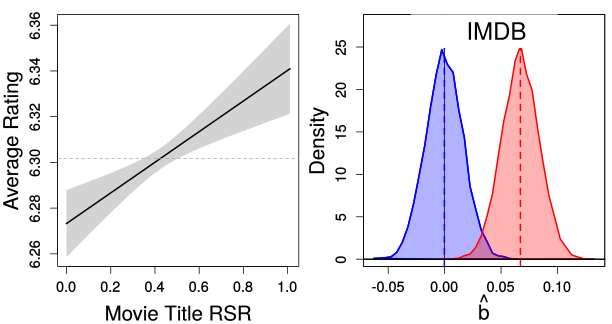

In [5]:
options(repr.plot.width=8.5, repr.plot.height=4.5)
options(jupyter.plot_mimetypes = 'image/svg+xml')
plotLM(plotData, rests, bests, xlab="Movie Title RSR", ylab="Average Rating", booted=TRUE, coords=c(mean(df$RSA), mean(df$V)))
legend(x="top","IMDB", box.lty=0, box.lwd=0, bg="white", cex=2)

In [15]:
isen <- df$lang == "English"
dfcontrols <- data.frame(df$nameLen, df$nwords, df$avgLetterFreq, df$avgWordFreq, df$nR, df$year, isen)
linModelsControl(df$V, df$RSR, dfcontrols, dsname)

In [6]:
load(paste(runsfolder,"LinModel.RData", sep="/"))
load(paste(runsfolder,"LinModelNorm.RData", sep="/"))
load(file=paste(runsfolder,"LinModelRobust.RData",sep="/"))
load(file=paste(runsfolder,"LinModelControl.RData",sep="/"))

In [7]:
suppressMessages(library(stargazer))
names(linModel$coefficients) <- c( "1", "RSR")
names(linModelNorm$coefficients) <- c( "1", "RSR")
names(linModelRobust$coefficients) <- c( "1", "RSR")
names(linModelControl$coefficients) <- c( "1", "RSR")

Controls: number of letters, average letter frequency, number of words, average word frequency, number of ratings, is in English, year of release

In [8]:
stargazer(linModel, linModelNorm, linModelRobust,linModelControl, style="asr", digits=4, keep.stat=c("rsq", "n"), model.numbers=F, omit.table.layout="dm", column.labels=c("OLS", "Normalized", "Robust (MM)", "Residualized"), title=paste("Regression results for", msg), digit.separator=".", type="text")


Regression results for IMDB Movies
-------------------------------------------------
       OLS    Normalized Robust (MM) Residualized
-------------------------------------------------
1   6.2733***   0.0000    6.3637***   -0.0377*** 
RSR 0.0670*** 0.0070***   0.0618***   0.0887***  
N    327.608   327.608     327.608     327.608   
R2   0.00005   0.00005     0.00005      0.0001   
-------------------------------------------------
*p < .05; **p < .01; ***p < .001                 


In [9]:
load(file=paste(runsfolder,"LinModel.RData",sep="/"))
load(file=paste(runsfolder,"LinModelRobust.RData",sep="/"))
load(file=paste(runsfolder,"RndEsts.RData",sep="/"))
load(file=paste(runsfolder,"Boot.RData",sep="/"))
load(file=paste(runsfolder,"SpearmanBoot.RData",sep="/"))
statsTable(dsname, linModel, bests, rests, rhoests, linModelRobust, msg=msg)

,t test p-value,bootstrap p-value,permutation p-value,Spearman p-value,robust p-value
,6.071604e-05,1e-04,0,4e-04,0.0001631875
